[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_6/Lecture_6_2.ipynb)

# Perceptron

A Perceptron is an algorithm used for supervised learning of binary classifiers. Binary classifiers decide whether an input, usually represented by a series of vectors, belongs to a specific class.

In short, a perceptron is a single-layer neural network. They consist of four main parts including input values, weights and bias, net sum, and an activation function.



How does a Perceptron work?


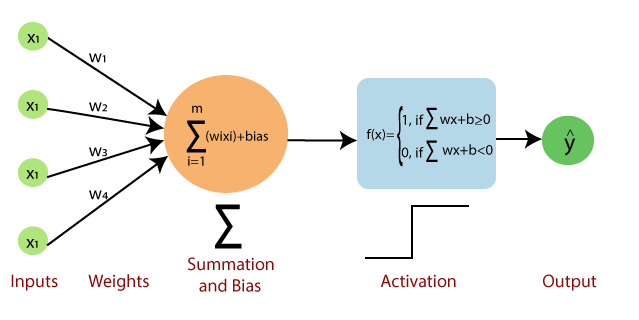
                            Source: https://medium.com/

The process begins by taking all the input values and multiplying them by their weights. Then, all of these multiplied values are added together to create the weighted sum. The weighted sum is then applied to the activation function, producing the perceptron's output. The activation function plays the integral role of ensuring the output is mapped between required values such as (0,1) or (-1,1). It is important to note that the weight of an input is indicative of the strength of a node. Similarly, an input's bias value gives the ability to shift the activation function curve up or down.

As a simplified form of a neural network, specifically a single-layer neural network, perceptrons play an important role in binary classification. This means the perceptron is used to classify data into two parts, hence binary. 

                                                  Source: https://deepai.org/machine-learning-glossary-and-terms/perceptron


### Task

The idea of this project is to perform a classification of coffees from two countries (Colombia and Guatemala) using  perceptron algorthms. Three parameters will be used for analysis: altitude, flavor and balance. The parameters of the two countries are similar, which makes the classification process quite complex. Throughout the entire 577 projects, I sought to find the best algorithm that would allow me to identify Colombian coffee based on cup measurement and production altitude. The results will be compared by ranking score. The perceptron built in class and the functions of the Sklearn library are used.



### Cool coffee fact!

Why Colombia and Guatemala produce high quality coffee? Both countries have similar environmental condition and produce "high altitude coffee". The term high altitude coffee refers to the climate and altitude where the plant was grown. This characteristic is very important, since it directly influences the size, shape and flavor of the coffee. As the coffee plantation grows at different altitudes with respect to the sea, the humidity changes, as well as the vegetation and fauna. These elements influence the dynamics and interactions of the agroecosystem. The minimum altitude at which the coffee plantation must grow to be considered high altitude coffee is 900 meters above sea level. High altitude coffee beans are denser, this is partly due to the slow growth that occurs in a high altitude environment. The seeds should have a closed zig-zag or slightly crooked crack.A coffee grown at a lower altitude has denser grains and a semi-open crack. The height also influences the flavor, one of the most appreciated characteristics, when the coffee grows at a higher altitude and is well cared for, it will result in a cup with greater acidity, it will be more aromatic and tasty.

In [65]:
#Libraries used 

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions



### Ploting the parameters for Colombia and Guatemala


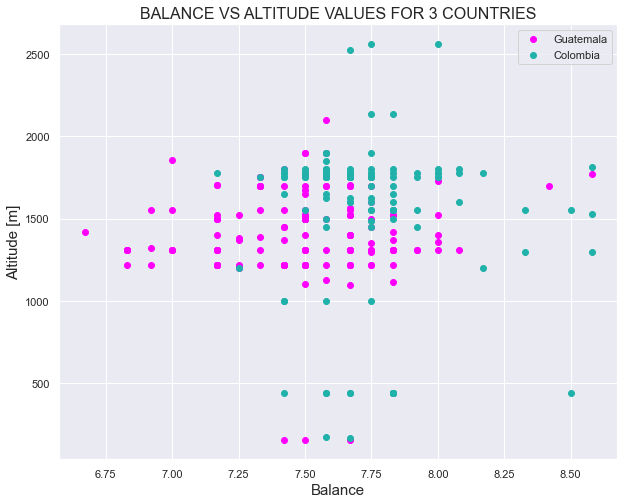

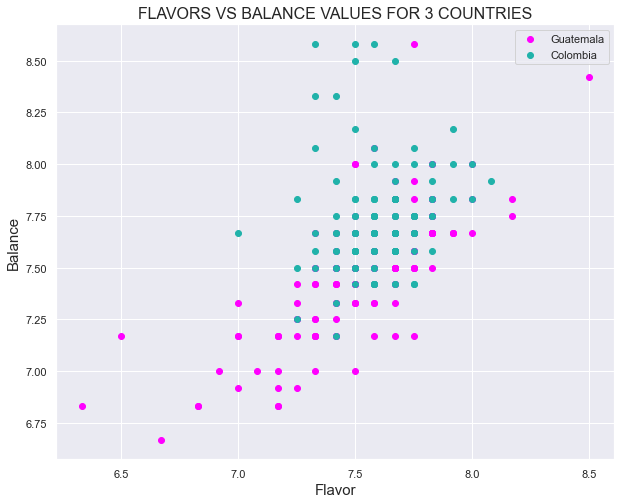

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)

#Extracting countries 
countries = ["Guatemala","Colombia"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax.scatter(temp_df.Balance,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax.set_xlabel("Balance", fontsize = 15)
ax.set_ylabel("Altitude [m]", fontsize = 15)
ax.set_title("BALANCE VS ALTITUDE VALUES FOR 3 COUNTRIES", fontsize = 16)
ax.legend()
plt.show()

fig2, ax2 = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df2 = cafe[cafe.Country == country]
    ax2.scatter(temp_df2.Flavor,
               temp_df2.Balance,
               c = color,
               label = country, 
               )
    
ax2.set_xlabel("Flavor", fontsize = 15)
ax2.set_ylabel("Balance", fontsize = 15)
ax2.set_title("FLAVORS VS BALANCE VALUES FOR 3 COUNTRIES", fontsize = 16)
ax2.legend()

plt.show()

It can be seen that the classification is not easy, there are quite a few overlappings in the points in the two countries. Apparently the classification using balance and flavor should be better than using balance and altitude. Let's see what the analysis shows us.

In [66]:
#Class perceptron built in class

class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Analizing variables flavor and balance (two differents epochs)

In [50]:
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X = cafe_filter[[ 'Flavor', 'Balance']]. iloc[:100].values
y = cafe_filter['Country'].iloc[:100].values

y = np.where(y == 'Colombia', -1, 1)


# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

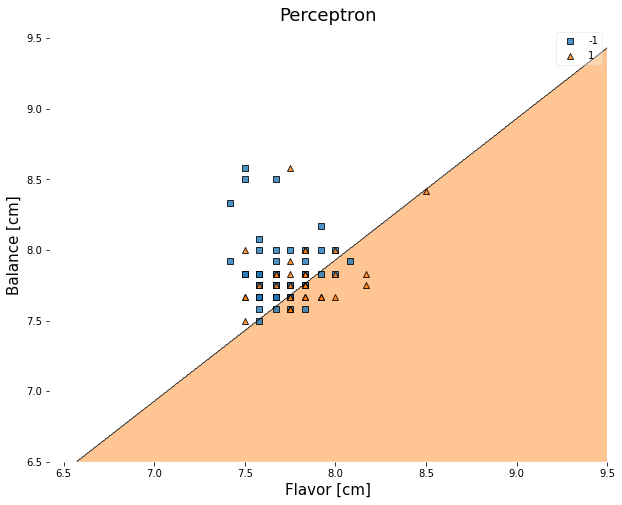

In [51]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron Echos", fontsize = 18)
plt.xlabel("Flavor [cm]", fontsize = 15)
plt.ylabel("Balance [cm]", fontsize = 15)
plt.show()


In [54]:
clf2 = Perceptron(tol=1e-3, random_state=5)
clf2.fit(X, y)
Perceptron()
clf2.score(X, y)


0.62

Classification using perceptron for the flavor-balance parameters produces a result of 64%, and is not affected by the change in epoch from 1000 to 3000. It is in the expected range due to the complexity of the data, but it is still a low value.

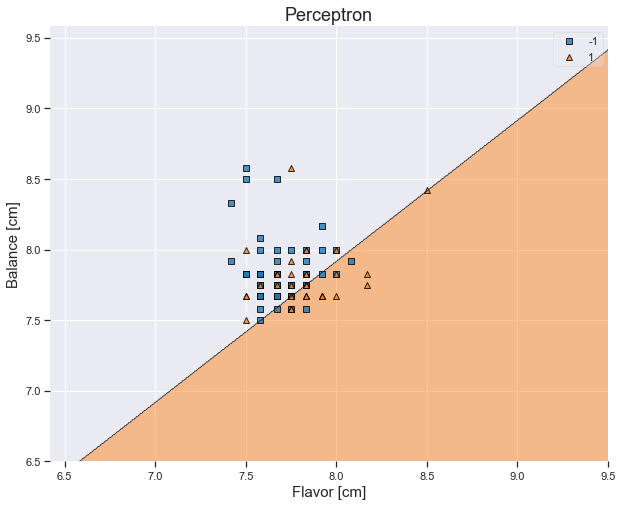

In [67]:
percep = Perceptron(epochs = 3000)
# Call the train method to train the weights and bias of the given instance
percep.train(X, y)
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron", fontsize = 18)
plt.xlabel("Flavor [cm]", fontsize = 15)
plt.ylabel("Balance [cm]", fontsize = 15)
plt.show()

### Analizing the variables flavor and altitud_mean meters 

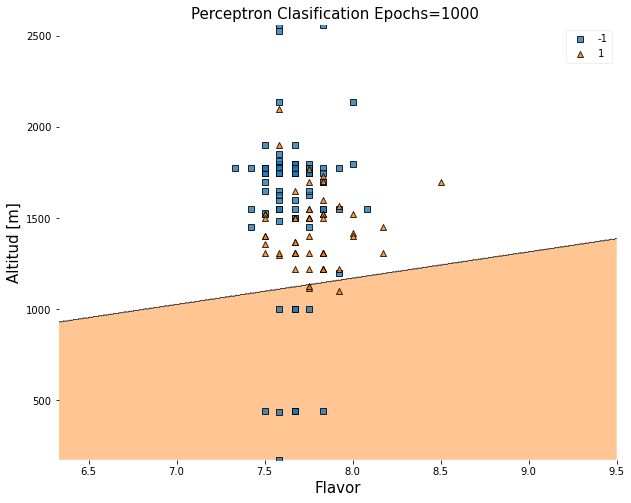

In [38]:
X1 = cafe_filter[['Flavor', 'altitude_mean_meters']]. iloc[:150].values
y1 = cafe_filter['Country'].iloc[:150].values

y1 = np.where(y1 == 'Colombia', -1, 1)
#Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)
# Call the train method to train the weights and bias of the given instance
percep.train(X1, y)
plt.figure(figsize = (10, 8))
plot_decision_regions(X1, y1, clf = percep)
plt.title("Perceptron Clasification Epochs=1000 ", fontsize = 15)
plt.xlabel("Flavor", fontsize = 15)
plt.ylabel("Altitud [m]", fontsize = 15)
plt.show()

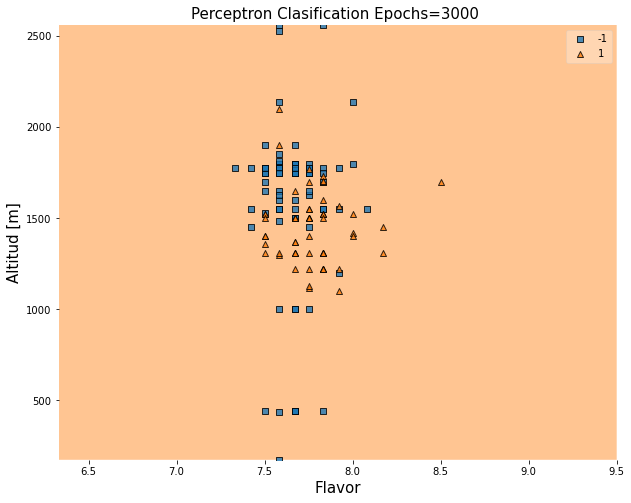

In [44]:
X1 = cafe_filter[['Flavor', 'altitude_mean_meters']]. iloc[:150].values
y1 = cafe_filter['Country'].iloc[:150].values
y1 = np.where(y1 == 'Colombia', -1, 1)
#Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 3000)
# Call the train method to train the weights and bias of the given instance
percep.train(X1, y)
plt.figure(figsize = (10, 8))
plot_decision_regions(X1, y1, clf = percep)
plt.title("Perceptron Clasification Epochs=3000 ", fontsize = 15)
plt.xlabel("Flavor", fontsize = 15)
plt.ylabel("Altitud [m]", fontsize = 15)
plt.show()

In [55]:
clf2 = Perceptron(tol=1e-3, random_state=5)
clf2.fit(X1, y1)
Perceptron()
clf2.score(X1, y1)


0.4

Classification using perceptron for the flavor-altitude parameters produces a result of 40%, and ii is affected by the change in epoch from 1000 to 3000. It is expected a low score due to the complexity of the data. In conclusion, the best scenario to clasify Colombia or Guatemela coffee samples using Perceptron is 64%. 